In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
import matplotlib.pyplot as plt


In [4]:
base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [5]:
base_model.trainable=False

In [6]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
predictions=Dense(10,activation='softmax')(x)

In [7]:
model = Model(inputs=base_model.input, outputs=predictions)


In [8]:
model.compile(
    metrics=['Accuracy'],
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [9]:
datagen=ImageDataGenerator(rescale=1.0/255.0,
                          validation_split=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,)

In [10]:
train_data=datagen.flow_from_directory(
    "C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/12 Animal/raw-img",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset="training"
)

Found 20995 images belonging to 10 classes.


In [11]:
val_data=datagen.flow_from_directory(
    "C:/Users/Nanda Kisore Biswas/Desktop/BE/DL_Datasets/12 Animal/raw-img",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5244 images belonging to 10 classes.


In [12]:
history=model.fit(train_data,validation_data=val_data,epochs=1)

C:\Users\Nanda Kisore Biswas\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - Accuracy: 0.8726 - loss: 0.4147

C:\Users\Nanda Kisore Biswas\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


657/657 ━━━━━━━━━━━━━━━━━━━━ 2965s 4s/step - Accuracy: 0.8727 - loss: 0.4145 - val_Accuracy: 0.9430 - val_loss: 0.1863


In [13]:
test_loss,test_accuracy=model.evaluate(val_data)
print("Test Loss:",test_loss)
print("\nTest Accuracy:",test_accuracy)

164/164 ━━━━━━━━━━━━━━━━━━━━ 252s 2s/step - Accuracy: 0.9448 - loss: 0.1729
Test Loss: 0.18321621417999268

Test Accuracy: 0.9401220679283142


In [14]:
x_val,y_val=next(val_data)
predictions=model.predict(x_val)
predictions_labels=np.argmax(predictions,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


<function matplotlib.pyplot.show(close=None, block=None)>

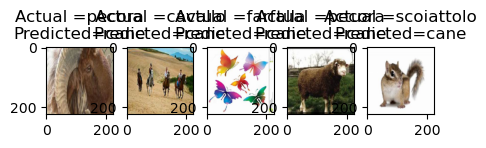

In [15]:
n=5
plt.figure(figsize=(5,15))
class_labels=list(train_data.class_indices.keys())
for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(x_val[i])
    actual_labels=class_labels[np.argmax(y_val[i])]
    predicted_label=class_labels[np.argmax(predictions_labels[i])]
    plt.title(f"Actual ={actual_labels}\nPredicted={predicted_label}")
plt.show

In [ ]:
#GlobalAveragePooling2D is a layer in Keras that performs global average pooling on a 2D feature map
#MobileNetV2=allowing it to generalize well for various computer vision tasks (like object classification, detection, etc.) and be fine-tuned for specific tasks.
#ImageDataGenerator=eprocessing of image datasets.
#Load MobileNetV2, a pre-trained model on the ImageNet dataset.
#Set include_top=False to exclude the final layer so we can customize the output layer.
#Set input_shape to (224,224,3) for RGB images of size 224x224 pixels.

#GlobalAveragePooling2D: Reduces the feature maps of the base model to a single value per channel, lowering the number of parameters.
#Dense(128, activation='relu'): Adds a fully connected layer with 128 neurons and ReLU activation, creating a new layer that will learn based on the features from the base model.
#Dense(10, activation='softmax'): Adds a final output layer with 10 neurons (for 10 classes) and softmax activation, which outputs a probability distribution across 10 classes.



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))

base_model.trainable=False

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
predictions=Dense(10,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.001),
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

datagen=ImageDataGenerator(rescale=1./255,
                           validation_split=0.2,
                           horizontal_flip=True,
                           zoom_range=0.2,
                           shear_range=0.2)

train_generator=datagen.flow_from_directory(
    "C:\\Users\Mayuri\\OneDrive\\Desktop\\DL\\raw-img",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator=datagen.flow_from_directory(
    "C:\\Users\Mayuri\\OneDrive\\Desktop\\DL\\raw-img",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



history=model.fit(train_generator,validation_data=validation_generator,epochs=5)

test_loss,test_acc=model.evaluate(validation_generator)
print("Test Loss:",test_loss)
print("\nTest Accuracy:",test_acc)

x_val,y_val=next(validation_generator)
predictions=model.predict(x_val)
predicted_labels=np.argmax(predictions,axis=1)

n=5
class_labels=list(train_generator.class_indices.keys())
plt.figure(figsize=(5,15))
for i in range(n):
    plt.subplot(n,1,i+1)
    plt.imshow(x_val[i])
    actual_label=class_labels[np.argmax(y_val[i])]
    predicted_label=class_labels[predicted_labels[i]]
    plt.title(f"Actual={actual_label}\nPredicted={predicted_label}")
    plt.axis("off")
plt.tight_layout()
plt.show()